# 数据概述
[代码参考](https://www.kaggle.com/dmitriy19/d/kaggle/us-baby-names/exploring-us-baby-names)

## 引入相关数据分析包
* pandas，用于数据集读取，处理和分析
* numpy，用于数据集处理
* matplotlib，用于数据可视化

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter

## 查看数据内容

In [3]:
data = pd.read_csv('./dataset/NationalNames.csv')
data.head()

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746


## 查看数据详情

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825433 entries, 0 to 1825432
Data columns (total 5 columns):
Id        int64
Name      object
Year      int64
Gender    object
Count     int64
dtypes: int64(3), object(2)
memory usage: 69.6+ MB


# 全美流行的婴儿名字 top10

In [5]:
# 将“姓名”和其数量进行统计，并放入“字典”变量中
names_dict = dict()

# 由于数据量多，耗时较长
for index, row in data.iterrows():
    # 按行遍历数据
    if row['Name'] not in names_dict:
        names_dict[row['Name']] = row['Count']
    else:
        names_dict[row['Name']] += row['Count']

In [7]:
name = 'Mary'
print '%s -> %i' %(name, names_dict.get(name))

name = 'Minnie'
print '%s -> %i' %(name, names_dict.get(name))

Mary -> 4130441
Minnie -> 159352


In [18]:
# 使用Counter计数器的most_common函数进行统计。
# 返回最常用的元素及其计数的列表
top_10 = Counter(names_dict).most_common(10)
print '全美流行的婴儿名字top10：'
for pair in top_10:
    print '姓名：%s -> 数量：%i' %(pair[0], pair[1])

全美流行的婴儿名字top10：
姓名：James -> 数量：5129096
姓名：John -> 数量：5106590
姓名：Robert -> 数量：4816785
姓名：Michael -> 数量：4330805
姓名：Mary -> 数量：4130441
姓名：William -> 数量：4071368
姓名：David -> 数量：3590557
姓名：Joseph -> 数量：2580687
姓名：Richard -> 数量：2564867
姓名：Charles -> 数量：2376700


# 全美最不流行婴儿名字 top10

In [21]:
print('全美最不流行婴儿名字top10：')
# most_common()返回list，使用切片操作选取最后10个数据
for pair in Counter(names_dict).most_common()[:-10:-1]:
    print '姓名：%s -> 数量：%i' %(pair[0], pair[1])

全美最不流行婴儿名字top10：
姓名：Jaede -> 数量：5
姓名：Wavalene -> 数量：5
姓名：Tyieshia -> 数量：5
姓名：Lillya -> 数量：5
姓名：Pauleta -> 数量：5
姓名：Deavyn -> 数量：5
姓名：Taonna -> 数量：5
姓名：Elijahray -> 数量：5
姓名：Graysie -> 数量：5


## 名字的平均长度

In [25]:
def average_length_data_transform():
    """
        统计每年男性、女性姓名的平均长度
    """
    # 按行遍历数据
    years = []
    
    # 女性姓名
    female_average_length = []
    female_average_name_length = dict()
    
    # 男性姓名
    male_average_length = []
    male_average_name_length = dict()
    
    for index, row in data.iterrows():
        # 按行遍历数据集
        if row['Gender'] == 'F':
            # 女性
            
            # 获取当前年份
            curr_year = row['Year']            
            # 当前记录姓名长度
            curr_name_length = len(row['Name'])
            
            if curr_year not in female_average_name_length:
                # 如果当前年份不在“字典”中，放入字典中
                # 比如: 1880年第一条女性记录：1 Mary 1880 F 7065，将做如下处理
                # {1880: [4, 1]}
                female_average_name_length[curr_year] = [curr_name_length, 1]
            else:
                # 比如: 1880年第二条女性记录: 2 Anna 1880 F 2604，将做如下处理
                # {1880: [4+4, 1+1]} -> {1880: [8, 2]}
                female_average_name_length[curr_year][0] += curr_name_length
                female_average_name_length[curr_year][1] += 1
        else:
            # 男性
            
            # 处理过程同上
            curr_year = row['Year']
            curr_name_length = len(row['Name'])
            if curr_year not in male_average_name_length:
                male_average_name_length[curr_year] = [curr_name_length, 1]
            else:
                male_average_name_length[curr_year][0] += curr_name_length
                male_average_name_length[curr_year][1] += 1
    
    # 遍历处理后的字典
    # 女性
    for key, value in female_average_name_length.items():
        years.append(key)
        female_average_length.append(float(value[0]) / value[1])
    
    # 男性   
    for key, value in male_average_name_length.items():
        years.append(key)
        male_average_length.append(float(value[0]) / value[1])
        
    return (female_average_length, female_average_name_length, male_average_length, male_average_name_length)

In [24]:
# 处理过程较长
female_average_length, female_average_name_length, male_average_length, male_average_name_length = average_length_data_transform()

In [34]:
# 查看结果 
for year in range(1880, 1891):
    print '年份:%i，总长：%i，个数：%i' %(year, female_average_name_length.get(year)[0], female_average_name_length.get(year)[1])

年份:1880，总长：5439，个数：942
年份:1881，总长：5394，个数：938
年份:1882，总长：5968，个数：1028
年份:1883，总长：6083，个数：1054
年份:1884，总长：6792，个数：1172
年份:1885，总长：6910，个数：1197
年份:1886，总长：7422，个数：1282
年份:1887，总长：7529，个数：1306
年份:1888，总长：8486，个数：1474
年份:1889，总长：8494，个数：1479
年份:1890，总长：8856，个数：1534


In [35]:
print female_average_length[:10]

[5.773885350318471, 5.750533049040512, 5.80544747081712, 5.77134724857685, 5.795221843003413, 5.772765246449457, 5.789391575663027, 5.764931087289433, 5.757123473541384, 5.743069641649764]


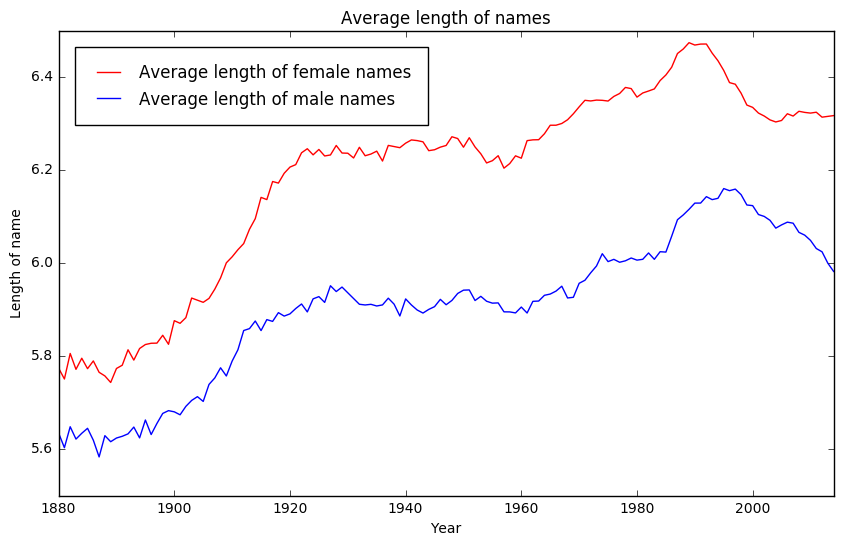

In [36]:
# years = [1880, 1881, ..., 2014]
years = range(1880, 2015)

# 使用matplotlib进行数据可视化
f, ax = plt.subplots(figsize=(10, 6))

# 设置x轴数值范围
ax.set_xlim([1880, 2014])

# years为x轴，average_length为y轴
# 女性曲线为红色，男性为蓝色
plt.plot(years, female_average_length, label='Average length of female names', color='r')
plt.plot(years, male_average_length, label='Average length of male names', color='b')

# 设置x,y轴标签
ax.set_ylabel('Length of name')
ax.set_xlabel('Year')

# 设置图像名称
ax.set_title('Average length of names')

# 设置图例
legend = plt.legend(loc='best', frameon=True, borderpad=1, borderaxespad=1)

## 唯一姓名分析
课后作业，自己阅读代码并查阅相关API进行分析并理解

In [13]:
top_in_each_year = dict()
years = range(1880, 2015)

for each_year in years:
    each_year_data = data[data['Year'] == each_year]
    top_in_each_year[each_year] = dict()
    for index, row in each_year_data.iterrows():            
        top_in_each_year[each_year][row['Name']] = row['Count']

In [14]:
all_sum = []
top_25_sum = []
for year, names_in_year in top_in_each_year.items():
    all_sum.append(sum(Counter(names_in_year).values()))
    top_25 = Counter(names_in_year).most_common(25)
    sum_temp = 0
    for pair in top_25:
        sum_temp += pair[1]
    top_25_sum.append(sum_temp)

In [15]:
percent_unique_names = np.array(top_25_sum).astype(float) / np.array(all_sum) * 100

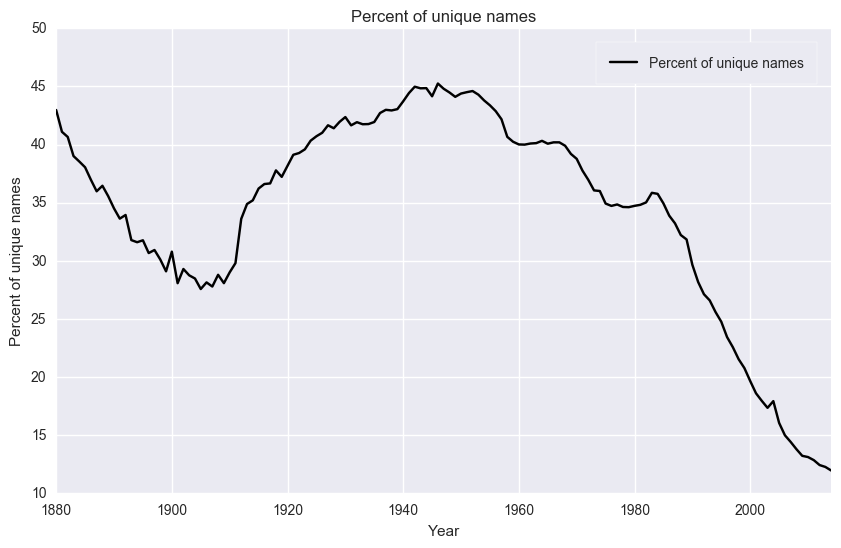

In [16]:
f, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim([1880, 2014])

plt.plot(years, percent_unique_names, label='Percent of unique names', color='black')

ax.set_ylabel('Percent of unique names')
ax.set_xlabel('Year')
ax.set_title('Percent of unique names')
legend = plt.legend(loc='best', frameon=True, borderpad=1, borderaxespad=1)